# This script creates a lot of descriptive plots and analysis based on the cleandata.csv file. There is a bit more analysis than what is presented in the paper. 

In [1]:
#import packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm 
import scipy.stats as stats
from stargazer.stargazer import Stargazer, LineLocation
import nltk
from nltk.corpus import stopwords
import lemmy
import matplotlib.patches as mpatches


In [2]:
dataset = pd.read_csv("data/cleandata.csv",index_col="Unnamed: 0")


In [3]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize': (12,8)})


# I begin by making some descriptive stats on the sample that i have 
THis is on the full dataset minus the ones before the startdate. I first remove the ones without faces when i have to do stats on them. This is just to be able to tell a compelling story of the politicians use of Instagram. 

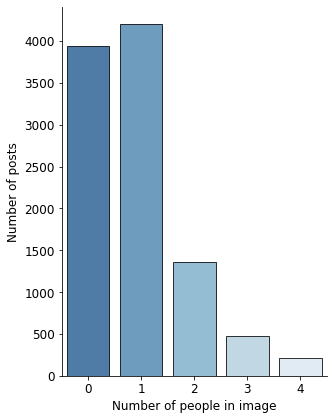

In [4]:

bars = sns.catplot(x='n_people', kind='count', data=dataset, alpha = 0.8,edgecolor = "black", palette="Blues_r",height=6, aspect=0.8)

#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')

#top_bar = mpatches.Patch(color='red', label='smoker = No')
#bottom_bar = mpatches.Patch(color='blue', label='smoker = Yes')
#plt.legend(handles=[top_bar, bottom_bar])

plt.xlabel("Number of people in image")
plt.ylabel("Number of posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
#plt.title("Number of women in image")
plt.xlim(-0.5,4.5)
plt.xticks([0,1,2,3,4],[0,1,2,3,4])

plt.savefig("plots\people_in_posts.png",bbox_inches = "tight")

plt.show()

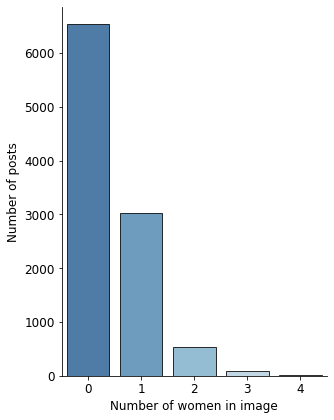

In [5]:

bars = sns.catplot(x='n_women', kind='count', data=dataset, alpha = 0.8,edgecolor = "black", palette="Blues_r",height=6, aspect=0.8)

#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')

#top_bar = mpatches.Patch(color='red', label='smoker = No')
#bottom_bar = mpatches.Patch(color='blue', label='smoker = Yes')
#plt.legend(handles=[top_bar, bottom_bar])

plt.xlabel("Number of women in image")
plt.ylabel("Number of posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
#plt.title("Number of women in image")
plt.xlim(-0.5,4.5)
plt.xticks([0,1,2,3,4],[0,1,2,3,4])

plt.savefig("plots\women_in_posts.png",bbox_inches = "tight")

plt.show()

In [6]:
dataset.n_people.describe()

count    10192.000000
mean         0.903846
std          0.942554
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: n_people, dtype: float64

In [7]:
dataset.n_women.describe()

count    10192.000000
mean         0.433085
std          0.646873
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: n_women, dtype: float64

In [8]:
dataset.std_n_women.describe()

count    1.019200e+04
mean    -2.941132e-18
std      9.989691e-01
min     -2.005972e+00
25%     -5.920258e-01
50%     -3.984310e-01
75%      4.671245e-01
max      6.948792e+00
Name: std_n_women, dtype: float64

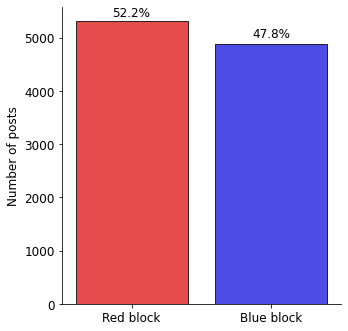

In [9]:
  
bars = sns.catplot(x='bloc', kind='count', data=dataset, palette= ["red","blue"],edgecolor = "black",alpha = 0.8)
plt.annotate(str(round((sum(dataset['bloc']=="r") / len(dataset['sex']) * 100),1))+"%",(0,5400), ha='center')
plt.annotate(str(round((sum(dataset['bloc']=="b") / len(dataset['sex']) * 100),1))+"%",(1,5000), ha='center')
#plt.rcParams['figure.figsize'] = (12,2)


plt.xlabel("")
plt.ylabel("Number of posts")
plt.xticks([0,1],["Red block","Blue block"])
#plt.title("Posts on Instagram")

#plt.savefig("plots\\bloc_share_posts.png",bbox_inches = "tight")


plt.show()

In [10]:
mandater = {'Siumut' : 1, 
            'Liberal Alliance' : 3, 
            'Radikale venstre' : 14,
            'Socialdemokratiet' : 49, 
            'Venstre' : 40, 
            'SF' : 15, 
            'Konservative' : 12, 
            'DF': 16, 
            'Løsgænger' : 8,
            'Enhedslisten' : 13, 
            'Nye Borgerlige' : 4, 
            'Javnaðarflokkurin': 1, 
            'Alternativet' : 1,
            'Inuit Ataqatigiit' : 1}


In [11]:
parties = dataset['party'].unique()
n_members = []
for party in parties:
        n_members.append(len(dataset[dataset['party'] == party]['user'].unique()))
        
        
party_users = pd.DataFrame(list(zip(parties, n_members,list(mandater.values()))), 
               columns =["party","users","mandates"]) 



party_list = dataset.groupby(["party"]).agg({"party": ['count']})['party']
party_list['percentage_posts'] = party_list['count'] / party_list['count'].sum() * 100
party_list.reset_index(inplace=True)
parties_df = pd.merge(party_list.sort_values(by = "party"), party_users.sort_values(by = "party"), on = "party")

parties_df['user_percentage'] = parties_df['users'] / parties_df['users'].sum() * 100
parties_df['mandate_percentage'] = parties_df['mandates'] / parties_df['mandates'].sum() * 100

parties_df.sort_values(by = "mandates",ascending=False, inplace=True)
parties_df = parties_df.reset_index(drop = True)


parties_df.loc[len(parties_df.index)] = ['Sambandsflokkurin', 0,0,0,1,0,0]     

parties_df['block'] = ["r","b","b","r","r","r","b","løsgænger","b","b","r","r","r","r","b"]

In [12]:
dataset[dataset['party'] == "Løsgænger"]["name"].unique()

array(['Uffe Elbæk', 'Sikandar Siddique', 'Simon Emil Ammitzbøll Bille',
       'Inger støjberg', 'Susanne Zimmer'], dtype=object)

In [13]:
parties_df

,party,count,percentage_posts,users,mandates,user_percentage,mandate_percentage,block
0,Socialdemokratiet,2271,22.282182,27,49,21.09375,27.528090,r
1,Venstre,2154,21.134223,33,40,25.78125,22.471910,b
2,DF,1219,11.960361,10,16,7.81250,8.988764,b
3,SF,1068,10.478807,13,15,10.15625,8.426966,r
4,Radikale venstre,858,8.418367,12,14,9.37500,7.865169,r
5,Enhedslisten,568,5.572998,7,13,5.46875,7.303371,r
6,Konservative,612,6.004710,10,12,7.81250,6.741573,b
7,Løsgænger,443,4.346546,5,8,3.90625,4.494382,løsgænger
8,Nye Borgerlige,787,7.721743,4,4,3.12500,2.247191,b
9,Liberal Alliance,90,0.883046,3,3,2.34375,1.685393,b


In [14]:
#i add the independets to their bloc - source: https://www.ft.dk/searchResults.aspx?sortedDescending=false&party=1626e331-893b-4130-894a-e0f1726ba5fb
#blues: Simon Emil, Inger Støjberg, Lars Løkke and Orla Østerby
#red: Uffe elbæk, Sikandar siddique, Susanne zimmer 
# I also add jens rohde to red as he was in RV on the 11th of march  as he changed to blue block 
blue = parties_df[parties_df['block'] == "b"]["mandates"].sum() + 4
red = parties_df[parties_df['block'] == "r"]["mandates"].sum() +4

In [15]:

r_posts = sum(dataset['bloc']=="r")
b_posts = sum(dataset['bloc']=="b")

r_users = len(dataset[dataset['bloc'] == 'r']['user'].unique())
b_users = len(dataset[dataset['bloc'] == 'b']['user'].unique())

r_share = r_posts / (r_posts + b_posts)
b_share = b_posts / (r_posts + b_posts)

r_share_user =  r_users / ( r_users +  b_users)
b_share_user = b_users / (r_users + b_users)

blue_share = blue / 179
red_share = red / 179

In [16]:
print(r_posts,b_posts,r_users,b_users,blue,red)

5317 4875 66 62 80 99


In [17]:
pal = sns.color_palette("muted")
print(pal.as_hex())

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


In [18]:
plt.rcParams.update({'font.size': 16})

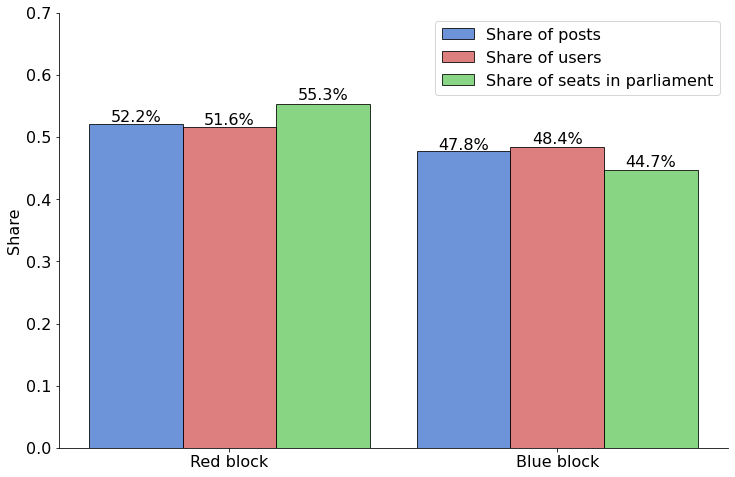

In [19]:
fig, axs = plt.subplots(figsize=(12,8))
#axs.figure(figsize=(12,8))

axs.bar([-0.2,1.2],[r_share,b_share],  0.40, label = "Share of posts", color = "#4878d0",edgecolor = "black", alpha = 0.80)
axs.bar([0.2,1.6],[r_share_user,b_share_user],  0.40, label = "Share of users", edgecolor = "black", color = "#d65f5f", alpha = 0.8)
axs.bar([0.6,2],[red_share,blue_share],  0.40, label = "Share of seats in parliament",edgecolor = "black",color = "#6acc64", alpha = 0.8)





plt.annotate(str(round(r_share,3)*100) + "%",(-0.2,0.525), ha='center')
plt.annotate(str(round(r_share_user,3)*100) + "%",(0.2,0.52), ha='center')
plt.annotate(str(round(red_share*100,1)) + "%",(0.6,0.56), ha='center')

plt.annotate(str(round(b_share,3)*100)+"%",(1.2,0.48), ha='center')
plt.annotate(str(round(b_share_user,3) * 100)+"%",(1.6,0.49), ha='center')
plt.annotate(str(round(blue_share,3) * 100)+"%",(2,0.452), ha='center')


axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)



plt.ylim(0,0.7)
plt.legend()
plt.ylabel("Share")
#plt.xlabel("Party")
#plt.xlim(-0.5,13.5)
plt.xticks([0.2,1.6],["Red block", "Blue block"])
#plt.title("Share of users and posts in each block")
#plt.title("Number of Instagram users compared to Number of seats in parlariment")
#plt.savefig("plots\\block_share_share.png",bbox_inches = "tight")
plt.show()

# Gender distribution

In [20]:
m_users = len(dataset[dataset['sex'] == 'm']['user'].unique())
f_users = len(dataset[dataset['sex'] == 'f']['user'].unique())



In [21]:
m_users /128

0.5078125

In [22]:
f_users /128

0.4921875

In [23]:
len(dataset)

10192

In [24]:
sum(dataset.sex == "f")

5923

In [25]:
sum(dataset.sex == "m")

4269

In [26]:
plt.rcParams.update({'font.size': 12})


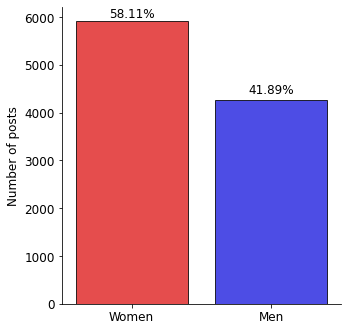

In [27]:
  
bars = sns.catplot(x='sex', kind='count', data=dataset, palette= ["red","blue"],edgecolor = "black",alpha = 0.8)
plt.annotate(str(round((sum(dataset['sex']=="f") / len(dataset['sex']) * 100),2))+"%",(0,6000), ha='center')
plt.annotate(str(round((sum(dataset['sex']=="m") / len(dataset['sex']) * 100),2))+"%",(1,4400), ha='center')

#plt.annotate(sum(dataset['sex']=="f"),(0,5550), ha='center')
#plt.annotate(sum(dataset['sex']=="m"),(1,4000), ha='center')
#plt.rcParams['figure.figsize'] = (12,2)


plt.xlabel("")
plt.ylabel("Number of posts")
plt.xticks([0,1],["Women","Men"])
#plt.title("Posts on Instagram")

#plt.savefig("plots\\gender_share.png",bbox_inches = "tight")


plt.show()

### look at the parties

In [28]:
plt.rcParams.update({'font.size': 16})

In [29]:
parties_for_plot = ["Social Democrats",
                    "Liberal Party",
                    "Danish people's party",
                    "Socialist People’s Party",
                    "Social-Liberal Party",
                    "Red-Green Alliance",
                    "Conservative",
                    "Indepedents",
                    "New Right",
                    "Liberal Alliance",
                    "Alternative",
                    "Inuit Ataqatigiit",
                    "Javnaðarflokkurin",
                    "Siumut"]

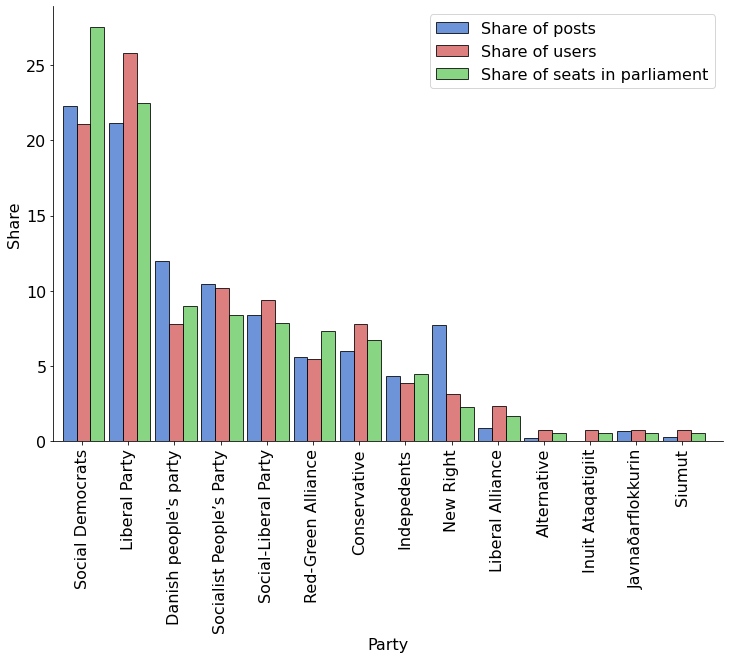

In [30]:
fig, axs = plt.subplots(figsize=(12,8))
#plt.rcParams.update({'font.size': 16})





axs.bar(parties_df.index - 0.15 ,parties_df["percentage_posts"],  0.30, label = "Share of posts",color = "#4878d0",edgecolor = "black", alpha = 0.8)
axs.bar(parties_df.index + 0.15,parties_df["user_percentage"],  0.30, label = "Share of users", color = "#d65f5f", edgecolor = "black",alpha = 0.8)
axs.bar(parties_df.index + 0.45,parties_df["mandate_percentage"], 0.30, label = "Share of seats in parliament",color = "#6acc64",edgecolor = "black", alpha = 0.8)
plt.legend()
plt.ylabel("Share")
plt.xlabel("Party")
plt.xlim(-0.5,14)
#plt.xticks([0.12,1.12,2.12,3.12,4.12,5.12,6.12,7.12,8.12,9.12,10.125,11.12,12.12,13.12],parties_df["party"][0:14], rotation = 90)
plt.xticks([0.12,1.12,2.12,3.12,4.12,5.12,6.12,7.12,8.12,9.12,10.125,11.12,12.12,13.12],parties_for_plot, rotation = 90)

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

#plt.title("Number seats and users")

#plt.savefig("plots\\share_parties_all3.png",bbox_inches = "tight")
plt.show()

In [31]:
plt.rcParams.update({'font.size': 12})

Group by individual politican to make a plot

In [32]:
user_list = dataset.groupby(["name","bloc"]).agg({"name": ['count']})['name']
user_list = user_list.sort_values(by = "count", ascending=False)
user_list.reset_index(inplace=True)

In [33]:
user_list

,name,bloc,count
0,Pernille Vermund,b,426
1,Pia Kjærsgaard,b,373
2,Mette Frederiksen,r,291
3,liselott blixt,b,273
4,Pia Olsen Dyhr,r,240
...,...,...,...
123,Simon Emil Ammitzbøll Bille,b,4
124,Marie Krarup,b,2
125,Kirsten Normann Andersen,r,2
126,Rune Lund,r,1


In [34]:
user_list['count'].describe()

count    128.000000
mean      79.625000
std       73.307786
min        1.000000
25%       28.500000
50%       63.000000
75%      113.250000
max      426.000000
Name: count, dtype: float64

# Distribution of superuserness

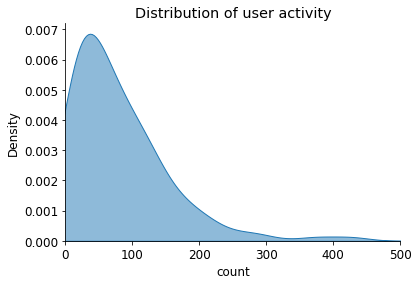

In [35]:

#sns.displot(x="count", hue="bloc",data=user_list, palette = ["b","r"],legend="",bins = 5, alpha = 0.5)
#plt.legend( loc='upper right', labels=['Rød blok', 'Blå blok'])
#plt.savefig("plots\\dist_users_posts1.png")
plt.figure(figsize=(6,4))

sns.kdeplot(x="count", data=user_list, legend="", alpha = 0.5, shade = True)
plt.xlim(0,500)
#plt.legend( loc='upper right', labels=['Red block', 'Blue block'])
sns.despine()
plt.title("Distribution of user activity")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
#plt.savefig("plots\\dist_user_activity.png",bbox_inches = "tight")


plt.show()

In [36]:
max_outlier = (114.250000 - 28.500000) * 1.5 + 80.27

In [37]:
ul1 = user_list[user_list['count']<167]
ul_10per = user_list[user_list['count']>167]
ul_sup = user_list[user_list['count']>207]

In [38]:
pal = sns.color_palette("Blues_r")
print(pal.as_hex())

['#0b559f', '#2b7bba', '#539ecd', '#89bedc', '#bad6eb', '#dbe9f6']


In [39]:
dataset

,level_0,index,post_nr,date,text,likes,user,date_clean,datetime,days_till_linde,...,women_binary,men_binary,year_week,std_n_women,fourteen_days,month,week_after,fourteen_days_after,month_after,days_till_linde_after
0,0,0,0,3 DAYS AGO,Nunarput ♥️,71.0,akimati,2021-02-15,2021-02-15,173,...,0,0,2021_7,-0.713477,12,5,24,12,5,173
1,1,1,1,4 DAYS AGO,So proud of @kunofencker. 🏆🏆🏆 You won the nati...,71.0,akimati,2021-02-14,2021-02-14,172,...,0,1,2021_6,-0.713477,12,5,24,12,5,172
2,2,2,2,FEBRUARY 2,Many people ask me how I can work as a parliam...,100.0,akimati,2021-02-02,2021-02-02,160,...,0,0,2021_5,-0.713477,11,5,22,11,5,160
3,3,3,3,JANUARY 23,Relatable af,108.0,akimati,2021-01-23,2021-01-23,150,...,0,1,2021_3,-0.713477,10,5,21,10,5,150
4,4,4,4,"DECEMBER 22, 2020",So excited for the kids to get home to us. I e...,19.0,akimati,2020-12-22,2020-12-22,118,...,0,0,2020_52,-0.713477,8,3,16,8,3,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,10187,11651,111,"MARCH 19, 2020",Sådan her ser møder med Kulturministeren ud fo...,102.0,zenia.stampe,2020-03-19,2020-03-19,-160,...,0,1,2020_12,-1.122497,-12,-6,-1,-1,-1,-1
10188,10188,11652,112,"MARCH 19, 2020","Jeg er glad for at kunne fortælle, at vi nu og...",228.0,zenia.stampe,2020-03-19,2020-03-19,-160,...,1,0,2020_12,0.387529,-12,-6,-1,-1,-1,-1
10189,10189,11653,113,"MARCH 18, 2020",Regeringen har lige fremlagt en hjælpepakke fo...,158.0,zenia.stampe,2020-03-18,2020-03-18,-161,...,1,0,2020_12,0.387529,-12,-6,-1,-1,-1,-1
10190,10190,11654,114,"MARCH 14, 2020",Den her tid sætter en masse tanker igang. Selv...,239.0,zenia.stampe,2020-03-14,2020-03-14,-165,...,1,0,2020_11,0.387529,-12,-6,-1,-1,-1,-1


In [40]:
#percentiles = list(np.percentile(user_list['count'], [0,10,20,30,40,50,60,70,80,90]))
#percentile = 1
#for i,n in enumerate(percentiles): 
 #   user_list.loc[user_list['count'] >= n,'percentile'] = i


In [41]:
#user_list

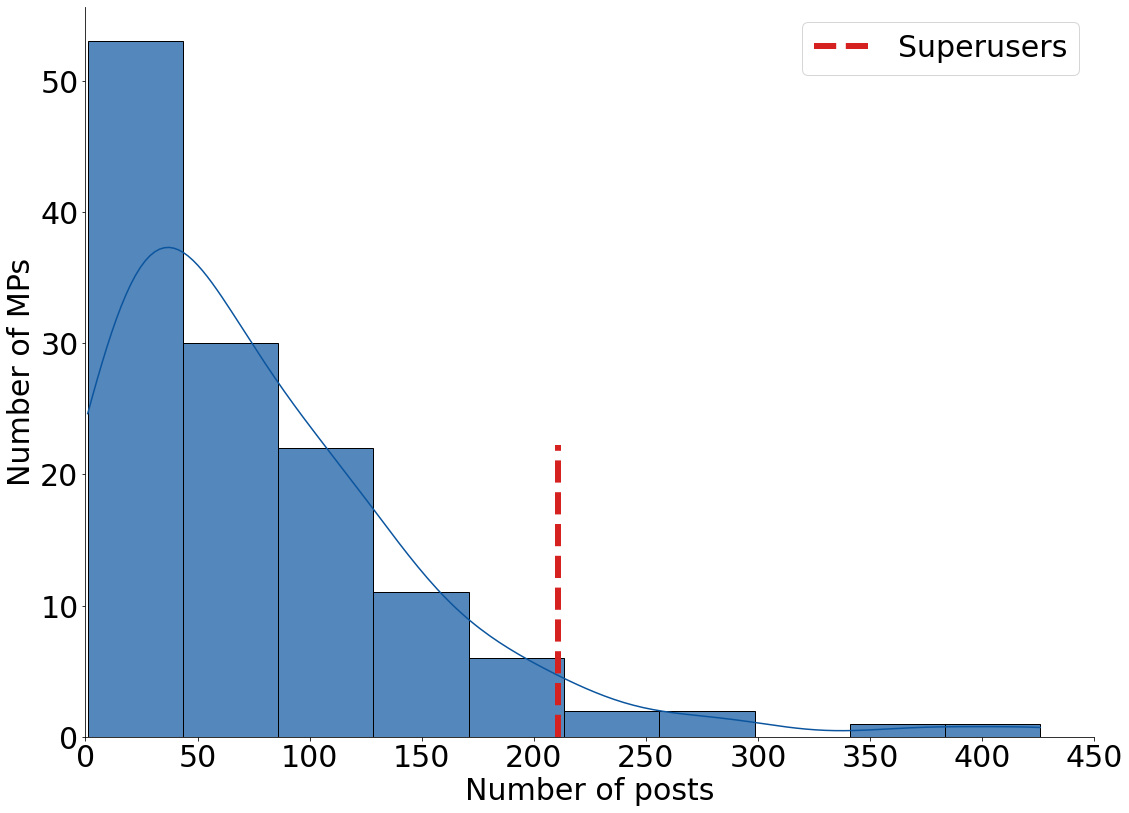

In [42]:
#plt.figure(figsize=(16,12))
plt.rcParams.update({'font.size': 30})
#sns.displot(x="count", hue="bloc",data=user_list, palette = ["b","r"],legend="",bins = 5, alpha = 0.5)
#plt.legend( loc='upper right', labels=['Rød blok', 'Blå blok'])
#plt.savefig("plots\\dist_users_posts1.png")
#plt.figure(figsize=(6,4))
#sns.set(rc={"figure.figsize":(16, 12)})
sns.displot(x= "count", data=user_list, 
            color = '#0b559f', 
            edgecolor = "black", 
            alpha = 0.7, 
            bins = 10, 
            kde = True, 
            height=12, 
            aspect=1.333)

#sns.displot(x= "count", data=user_list, edgecolor = "black", palette=pal, alpha = 0.7)

#plt.hist(ul1['count'], bins=10, histtype='step',color = "blue",)
#plt.hist(ul_10per['count'], bins=7, histtype='step',hatch='-',edgecolor='k')
#plt.hist(ul_sup['count'], bins=2, histtype='step',hatch='/', edgecolor='k')

plt.xlim(0,450)
#plt.legend( loc='upper right', labels=['Red block', 'Blue block'])
sns.despine()
#plt.title("Distribution of user activity")
plt.xlabel("Number of posts")
plt.ylabel("Number of MPs")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.axvline(x = 211, ymax = 0.4, color =  '#d52221', label = "Superusers", linestyle = "--", linewidth = 6) 
#plt.axvline(x = 167, color = 'black', label = "Top 10%", linestyle = "-.") 

plt.legend()
plt.savefig("plots\\dist_user_activity.png",bbox_inches = "tight")
#plt.xlabel("Number of posts in the period")
plt.show()

In [43]:
user_list

,name,bloc,count
0,Pernille Vermund,b,426
1,Pia Kjærsgaard,b,373
2,Mette Frederiksen,r,291
3,liselott blixt,b,273
4,Pia Olsen Dyhr,r,240
...,...,...,...
123,Simon Emil Ammitzbøll Bille,b,4
124,Marie Krarup,b,2
125,Kirsten Normann Andersen,r,2
126,Rune Lund,r,1


look at top 30

In [44]:
plt.rcParams.update({'font.size': 12})


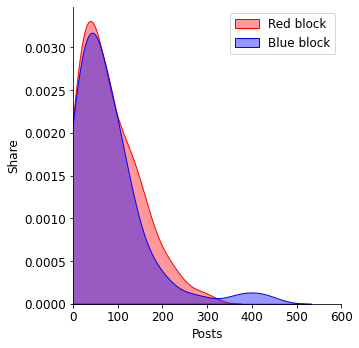

In [45]:

#sns.displot(x="count", hue="bloc",data=user_list, palette = ["b","r"],legend="",bins = 5, alpha = 0.5)
#plt.legend( loc='upper right', labels=['Rød blok', 'Blå blok'])
#plt.savefig("plots\\dist_users_posts1.png")
#plt.figure(figsize=(12,8))

sns.displot(x="count", hue="bloc",data=user_list,kind = "kde", palette = ["b","r"],legend="", alpha = 0.4, fill = True)
plt.xlim(0,600)
plt.legend( loc='upper right', labels=['Red block', 'Blue block'])
sns.despine()
#plt.title("Distribution of user activity in blocks")
plt.ylabel("Share")
plt.xlabel("Posts")

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
#plt.savefig("plots\\dist_users_posts2.png",bbox_inches = "tight")


plt.show()



In [46]:
user_list = user_list.head(10)

In [47]:
user_list['name']

0       Pernille Vermund
1         Pia Kjærsgaard
2      Mette Frederiksen
3         liselott blixt
4         Pia Olsen Dyhr
5    sofiecarstennielsen
6            Astrid Krag
7          Mette Thiesen
8         Susanne Zimmer
9            Ste?n Knuth
Name: name, dtype: object

In [48]:
names = ["Pernille Vermund", 
         "Pia Kjærsgaard", 
         "Mette Frederiksen", 
         "Liselott Blixt", 
         "Pia Olsen Dyhr", 
         "Sofie C. Nielsen",
         "Astrid Krag",
         "Mette Thiesen",
         "Susanne Zimmer",
         "Stén Knuth"]

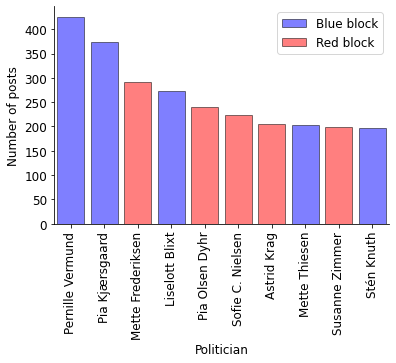

In [49]:
fig, axs = plt.subplots(figsize=(6,4))
#plt.bar(user_list['name'], user_list['count'], color = user_list['bloc'], alpha = 0.8 )
for n,name in enumerate(user_list['name']):
    if user_list.loc[user_list['name'] == name,'bloc'][n] == "b":
        plot_b = axs.bar(name,user_list.loc[user_list['name'] == name,'count'],  color = "b", alpha = 0.5, edgecolor = "black",label = "Blue block")
    else:
        plot_r = axs.bar(name,user_list.loc[user_list['name'] == name,'count'],  color = "r", alpha = 0.5,edgecolor = "black", label = "Red block")

#plt.bar(user_list.loc[user_list['bloc'] == "b",'name'] ,user_list.loc[user_list['bloc'] == "b",'count'],  color = "b", alpha = 0.8, label = "Blue block")
#plt.bar(user_list.loc[user_list['bloc'] == "r",'name'] ,user_list.loc[user_list['bloc'] == "r",'count'],  color = "r", alpha = 0.8, label = "Red block")
#plt.title("Top 10 posters on Instagram")
plt.ylabel("Number of posts")
plt.xlabel("Politician")
plt.xlim(-0.5,9.5)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
#sns.barplot(x='name', y = "count",hue = 'bloc', data=user_list, alpha = 0.8) 
plt.legend([plot_b, plot_r],['Blue block', 'Red block'])
plt.xticks([0,1,2,3,4,5,6,7,8,9],names,rotation = 90)
#plt.savefig("plots\\10_most.png",bbox_inches = "tight")

plt.show()

look at the dist of the users

In [50]:
dataset['n_women'] = [int(float(w)) for w in dataset['n_women']]
dataset['n_people'] = [int(float(w)) for w in dataset['n_people']]

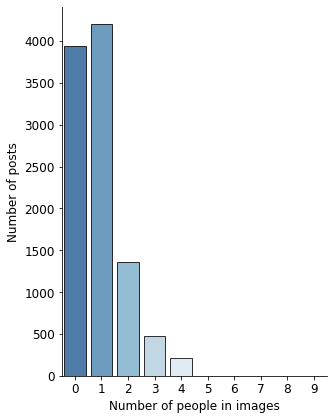

In [51]:
plt.rcParams.update({'font.size': 12})
bars = sns.catplot(x='n_people', kind='count', data=dataset, alpha = 0.8,edgecolor = "black", palette="Blues_r",height=6, aspect=0.8)
#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')

#plt.figure(figsize=(12, 8)) 

plt.xlabel("Number of people in images")
plt.ylabel("Number of posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
#plt.title("number of people in images")
plt.xlim(-0.5,9.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9],[0,1,2,3,4,5,6,7,8,9])

#plt.savefig("plots\\people_in_posts.png",bbox_inches = "tight")

plt.show()